## Manuscript figures 

Notebook generates figures 3-10 and tables 4-6 in Krell et al. (2021) Water Resources Research.

In [1]:
## Import packages
## We need to add the module path to our system path so 
## so that our notebook can find our local objects and code:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
     
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from math import exp
import seaborn as sns
import sys
import glob
from dateutil.relativedelta import *
from numpy.random import exponential, uniform
import scipy.stats as st
from statistics import mean

# Import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import StaticCrop
from farm import CropModel
from farm.functions import *
from farm.climate import make_climate_parameters, check_exponential, Climate

# Set background color
# plot.rc['figure.facecolor'] = 'white'
# plot.rc.axesfacecolor = 'white'

Laikipia station data was inputted.
2.5
1.0
7.0
[10.947058823529412, 8.136363636363637, 9.533333333333333, 10.286666666666667, 7.615, 12.233333333333333, 9.485714285714286, 12.923076923076923, 10.25357142857143, 11.6, 11.027058823529412, 11.756190476190477, 10.929824561403509, 8.595934959349593, 7.783076923076923, 9.315555555555555, 9.086666666666666, 12.5, 9.004, 12.193636363636363, 10.76393442622951, 10.508163265306122, 8.855555555555556, 10.893181818181818, 8.241999999999999, 10.32972972972973, 7.98918918918919, 10.506060606060606, 8.592727272727274, 8.084146341463414, 8.061176470588236, 6.152873563218391, 10.577611940298508, 6.956363636363637, 7.202857142857143, 6.271999999999999, 8.366666666666667] [0.057239057239057235, 0.06666666666666667, 0.03636363636363636, 0.045454545454545456, 0.06060606060606061, 0.045454545454545456, 0.06363636363636364, 0.0787878787878788, 0.16969696969696968, 0.2, 0.265625, 0.328125, 0.35625, 0.384375, 0.203125, 0.140625, 0.140625, 0.140625, 0.15625, 0.

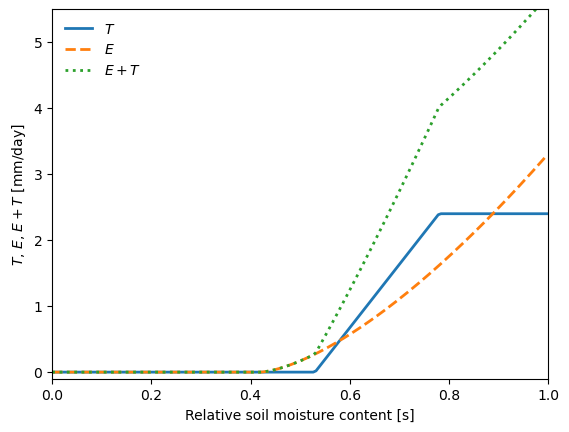

In [32]:
## Figure 4. Time series of T, E, and E+T

# Set OL JOGI climatology for the following figures
station = 'OL JOGI FARM'
interval='dekad'
data_file="../data/CETRAD/CETRAD_rainfall.csv"
texture='clay loam'

#TODO: create input rainfall using generate
a_mid, l_mid, sd = make_climate_parameters(data_file = data_file, station=station, interval=interval) 
ET_max = 7.0

# Make a dataframe with these alphas and lambdas
df_mid = pd.DataFrame({'alpha':a_mid, 'lambda':l_mid, 'dekad':np.arange(1,38,1),'doy':['10','20','30','40',
                                                                           '50','60','70','80','90','100',
                                                                            '110','120','130','140','150','160',
                                                                             '170','180','190','200','210','220',
                                                                             '230','240','250','260','270','280','290',
                                                                              '300','310','320','330','340','350','360','365'
                                                                              ]})
climate = Climate(
        data_file=data_file,
        station=station,
        interval=interval,
        alpha_r = a_mid,
        lambda_r = l_mid,
        ET_max = ET_max,
        do_std=False)
    
soil = Soil(texture)
# crop0 = Crop()
crop = StaticCrop(soil=soil, const_kc=1)
soil.set_nZr(crop)  
model = CropModel(crop=crop,soil=soil,climate=climate)

#TODO: Add warm-up period
model.run()

# Set saturation variable
s = np.arange(0, 1, 0.0056) #saturation

# Convert to vwc
vwc = s*Soil(texture).n 

def fig4_s_et(s, lai):
    plt.plot(s, [crop.calc_T(x, LAI=lai) for x in s], '-', linewidth=2)
    plt.plot(s, [climate.calc_E(x, LAI=lai, sh=0.42) for x in s],'--', linewidth=2)
    plt.plot(s, [crop.calc_T(x, LAI=lai) + climate.calc_E(x, LAI=lai, sh=0.42) for x in s],':', linewidth=2)

    plt.xlabel('Relative soil moisture content [s]') 
    plt.ylabel('$\mathit{T}$, $\mathit{E}$, $\mathit{E+T}$ [mm/day]') 
    plt.legend(['$\mathit{T}$', '$\mathit{E}$','$\mathit{E+T}$'], frameon=False)
    plt.ylim(-0.1,5.5)
    plt.xlim(0,1)

fig4_s_et(s, lai=1.5)
print(model.LAI[0])
print(model.kc[0])
# print(crop.ET_max)
print(climate.ET_max)
print(a_mid, l_mid, sd )

In [3]:
output = model.output()
output.head()

,kc,LAI,stress,R,s,I,E,ET,T,L,dsdt,dos,doy
0,1.0,2.5,1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
1,1.0,2.5,1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41
2,1.0,2.5,1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42
3,1.0,2.5,1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43
4,1.0,2.5,1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44


Laikipia station data was inputted.


[Text(0, 0.5, 'Relative soil \n moisture content [s]')]

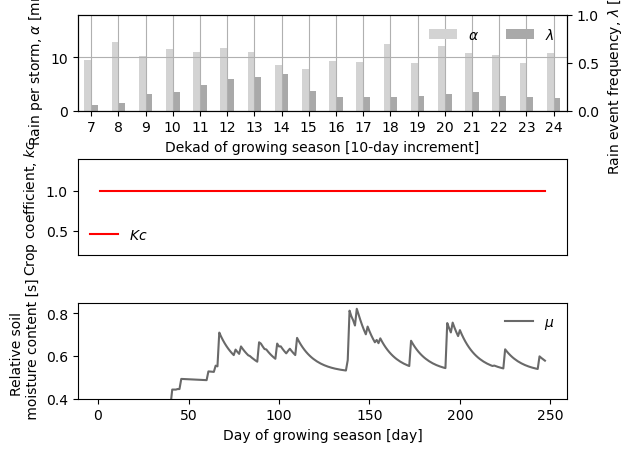

In [4]:
## Fig 5. Three figures to show non-stationarity
s0_climate = Climate(station='OL JOGI FARM', data_file='../data/CETRAD/CETRAD_rainfall.csv', interval='dekad')

# We want the unique values of alpha_r and lambda_r, so grab every 10th element of the list 
a = s0_climate.alpha_r[0::10]
l = s0_climate.lambda_r[0::10]

# Make a dataframe
dekads = pd.DataFrame({'alpha':a, 'lambda':l, 'dekad':np.arange(1,38,1),'day':['10','20','30','40',
                                                                           '50','60','70','80','90','100',
                                                                            '110','120','130','140','150','160',
                                                                               '170','180','190','200','210','220',
                                                                               '230','240','250','260','270','280','290',
                                                                               '300','310','320','330','340','350','360','365'
                                                                              ]})

# Figure set up
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex=False)
left   =  0.135  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .3     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# Subset dataframe
dekads = dekads[6:24].set_index('dekad').drop(['day'], axis=1)

# Plot the dekadal rainfall values
dekads.plot(kind="bar", ax=ax1, ylim=(0,18),rot=360, color=['lightgray','darkgray'])

ax1_ = ax1.twinx()
for r in ax1.patches[len(dekads):]:
    r.set_transform(ax1_.transData)

ax1.set_ylabel(r'Rain per storm, $\alpha$ [mm]')
ax1_.set_ylabel('Rain event frequency, $\lambda$ [day$^{-1}$]')
ax1.legend([r'$\alpha$', r'$\lambda$'], ncol=2, frameon=False)
ax1.set_xlabel('Dekad of growing season [10-day increment]')
ax1_.set_xlabel([''])

ax1.grid(which='major',axis='both')
_kc = output['kc']

ax2.plot(_kc, 'r-') 
ax2.set(ylabel='Crop coefficient, $\mathit{kc}$')
ax2.set_ylim(0.2, 1.4)
ax2.legend(['$\mathit{Kc}$'],frameon=False)
ax2.xaxis.set_visible(False)

# Plot c) Saturation
# output_s = pd.concat([d for d in output], axis=1) 
# avg_df_180 = output_s['s'].dropna() 
avg_df_180 = output['s'].dropna() 
# avg_df_180["mean"] = avg_df_180
# avg_df_180["var"] = avg_df_180.std(axis=1) 

avg_df_180.index = avg_df_180.index+1 # make doy cooperate better

# Convert to vwc
ax3.plot(avg_df_180, 'dimgray')
ax3.set_ylim(0.4, 0.85)

# x = np.arange(1, 181, 1)
# ax3.fill_between(x, avg_df_180['var']+avg_df_180['mean'], avg_df_180['mean']-avg_df_180['var'],facecolor='lightblue')
ax3.set(xlabel='Day of growing season [day]') 
ax3.legend(['$\mu$','$\sigma$'], ncol=2, frameon=False)
ax3.set(ylabel='Relative soil \n moisture content [s]')

Text(0.5, 0, 'Day of season [day]')

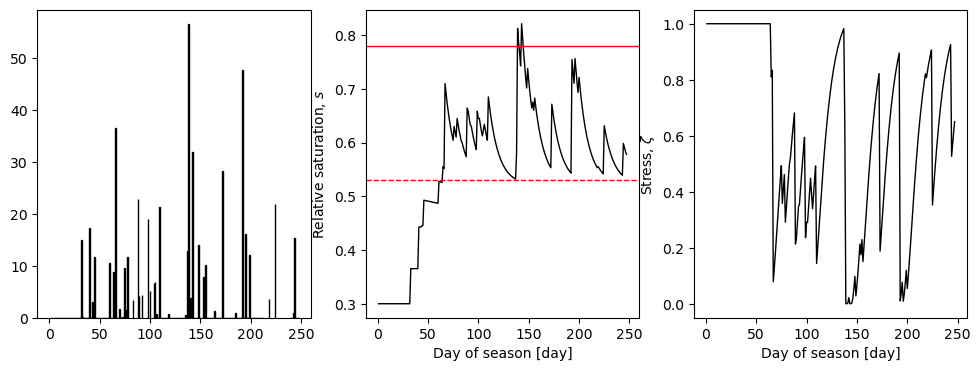

In [5]:
## Fig. 6: Time series of rainfall, s, and stress


f, axs = plt.subplots(nrows = 1, ncols = 3, sharex=True, figsize=(12,4))
# axs.format(
#     abc=True, abcloc='ul', suptitle='A single model output \n at %s' %station + ', for %s' %texture + ', planting date %s' %pd_sim
# )
# axs.tick_params('both', length=2, width=0.3, which='major', colors='k')

# Figure 1a: Rainfall from one simulation
rf = output['R']
stress = output['stress']

# Adjust index to account for the fact that python is zero-indexed
rf.index = rf.index+1 # change index so that we can see day of season
stress.index = stress.index+1

axs[0].bar(rf.index, rf, color='k', edgecolor='k') 
axs[0].set_ylabel='Daily rainfall [mm]'
axs[0].set_xlabel='Day of season [day]'

# # Figure 1c: stress from one simulation
axs[2].plot(stress, color='k', lw=1)
axs[2].set_ylabel('Stress, $\zeta$')
axs[2].set_xlabel('Day of season [day]')
    
# # Figure 1b: Soil moisture from one simulation
s = output['s']
_sstar = crop.s_star
_sw = crop.sw

# # LEGEND
hs = []
cycle = ['-','--']
var = [_sstar, _sw]
LABEL = ['Stress point (s*)','Wilting point (sw)']

# for item, cycle, LABEL in zip(var, cycle, LABEL):
#     h = axs[0,1].axhline(y=item, lw=1, color='r', linestyle=cycle, label=LABEL)
#     hs.append(h)

# f.legend(hs, loc='right', ncols=1, frame=True)

# # Adjust index to account for the fact that python is zero-indexed
s.index = s.index + 1

axs[1].plot(s, color='k', lw=1) # plot vwc for vwc
axs[1].axhline(y=_sstar, lw=1, color='r', linestyle=cycle[0], label=LABEL[0])
axs[1].axhline(y=_sw, lw=1, color='r', linestyle=cycle[1], label=LABEL[1])
axs[1].set_ylabel(r'Relative saturation, $s$')
axs[1].set_xlabel('Day of season [day]')


In [6]:
from exponential_model.functions import *

g:\Araki\maize-Toff\exponential_model\functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropmodel_output['dSdt(t-1)'] = cropmodel_output.dSdt.shift(+1)


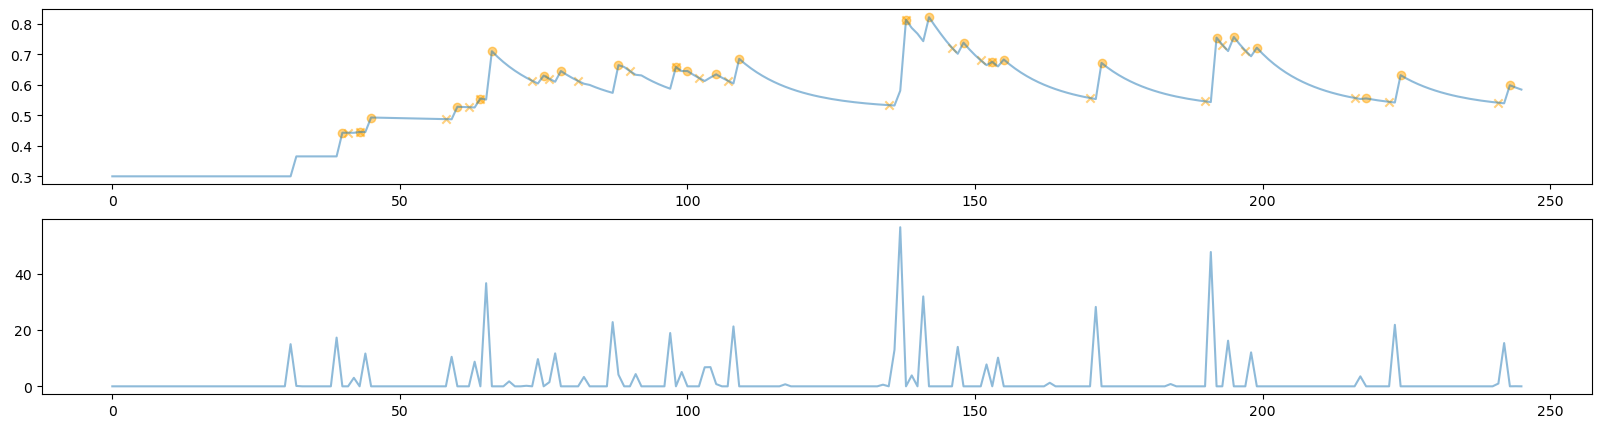

In [17]:
### Define thresholds ###
precip_thresh = 2
# Any positive increment smaller than 5% of the observed range of soil moisture at the site is excluded if it would otherwise truncate a drydown. 
dSdt_noise_thresh = 0.01 #(output.s.max() - output.s.min()) * 0.05
# To avoid noise creating spurious drydowns, identified drydowns were excluded from the analysis when the positive increment preceding the drydown was less than two times the target unbiased root-mean-square difference for SMAP observations (0.08).
dSdt_positive_thresh = 0
###########################
drydown_events = calc_dSdt(cropmodel_output=output, precip_thresh=precip_thresh, dSdt_positive_thresh=dSdt_positive_thresh, dSdt_noise_thresh=dSdt_noise_thresh, plot_results=True)

min_s = output.s.min()
drydown_params = []

for i, event in drydown_events.iterrows():
    fit_param = fit_exp_model(event, min_sm_values_at_the_pt=min_s)
    drydown_params.append(fit_param)

df_drydown_params = pd.DataFrame(drydown_params)


In [18]:
drydown_and_params = pd.merge(drydown_events, df_drydown_params.drop(columns='delta_theta'), on=['event_start', 'event_end'], how='outer')
drydown_and_params

,event_start,event_end,soil_moisture,precip,delta_theta,LAI,ET,theta_w,tau,r_squared,opt_drydown
0,45,58,"[0.4928396280789, 0.4924043288485498, 0.491972...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.047560,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ...","[0.08288097345868213, 0.08213912312237741, 0.0...",0.482308,19.067024,0.993883,"[0.49303535784191743, 0.4924872592390421, 0.49..."
1,66,73,"[0.7100348781343297, 0.6914472066010003, 0.674...","[0.0, 0.0, 0.0, 1.7591601735803226, 0.0, 0.0, ...",0.158247,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]","[3.5390926599459087, 3.1794093379681474, 2.858...",0.525250,9.444509,1.000000,"[0.7100231527186127, 0.6914592333776146, 0.674..."
2,78,81,"[0.6451145196219916, 0.63307597374768, 0.62223...","[0.0, 0.0, 0.0, 0.0]",0.034919,"[2.5, 2.5, 2.5, 2.5]","[2.292139134468932, 2.063887842802635, 1.85921...",0.580280,4.401834,0.997030,"[0.6455665649732731, 0.6322990447264454, 0.621..."
3,109,135,"[0.6851775750327271, 0.6691137230978393, 0.654...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.723...",0.080543,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ...","[3.058557408402627, 2.7500228599197545, 2.4740...",0.522252,9.723042,0.999997,"[0.6849829863952923, 0.6690782327882873, 0.654..."
4,142,146,"[0.8216256243351556, 0.7942939896870937, 0.768...","[0.0, 0.0, 0.0, 0.0, 0.0]",0.078524,"[2.5, 2.5, 2.5, 2.5, 2.5]","[5.073088113955374, 4.965433898981026, 4.67775...",0.623615,5.847125,0.996279,"[0.8236315935663434, 0.792189171597244, 0.7656..."
5,148,151,"[0.7381973127326484, 0.7167272532300463, 0.697...","[0.0, 0.0, 0.0, 0.0]",0.036351,"[2.5, 2.5, 2.5, 2.5]","[4.087899329295456, 3.669094560363943, 3.29547...",0.622884,4.400013,0.997174,"[0.7389813322134086, 0.7153792103771658, 0.696..."
6,155,170,"[0.6830266194886289, 0.6671802352139554, 0.652...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.260...",0.022651,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ...","[3.0171515658978296, 2.7129960313364925, 2.440...",0.523045,9.631654,0.999999,"[0.6829587174867933, 0.6671886320449851, 0.652..."
7,172,190,"[0.6717405323670445, 0.6570327334544868, 0.643...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.118425,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ...","[2.8003649129509824, 2.5190605988251935, 2.267...",0.522594,9.686695,0.999999,"[0.6716531033188637, 0.6570327056646694, 0.643..."
8,199,216,"[0.7216121338132786, 0.7018424409978439, 0.684...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.028025,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ...","[3.7641495120587702, 3.3803098005690684, 3.037...",0.523455,9.576536,0.999998,"[0.7214827394494214, 0.7018473159521401, 0.684..."
9,218,222,"[0.5553782658531378, 0.5521426785282962, 0.549...","[0.0, 0.0, 0.0, 0.0, 0.0]",0.001859,"[2.5, 2.5, 2.5, 2.5, 2.5]","[0.6160558266498265, 0.5568028582023061, 0.503...",0.533138,5.837730,0.998283,"[0.5555229276724358, 0.5519988404301795, 0.549..."


g:\Araki\maize-Toff\exponential_model\functions.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


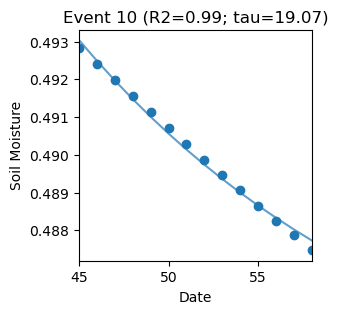

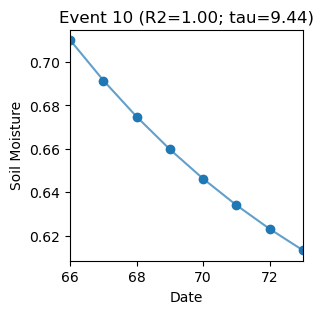

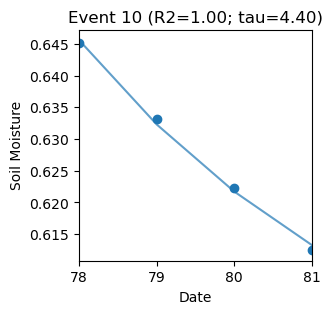

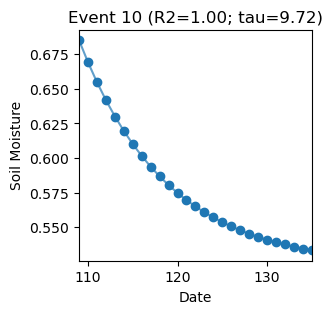

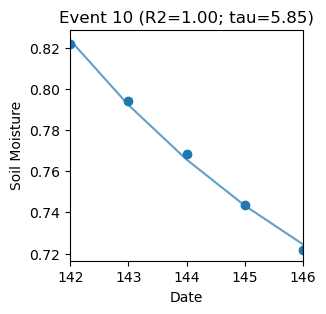

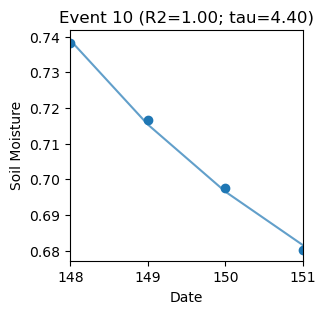

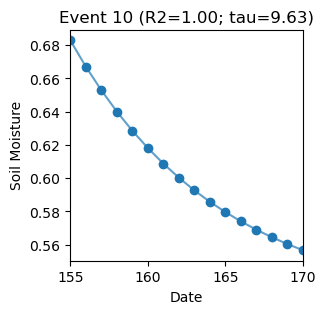

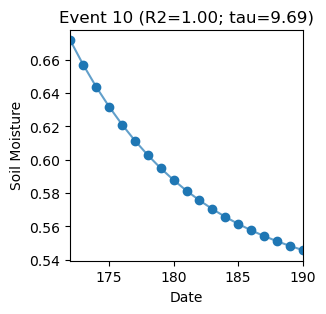

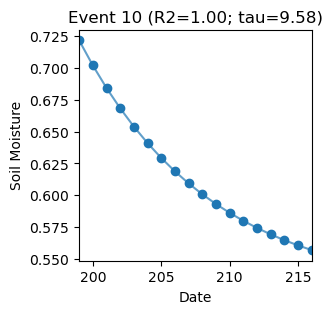

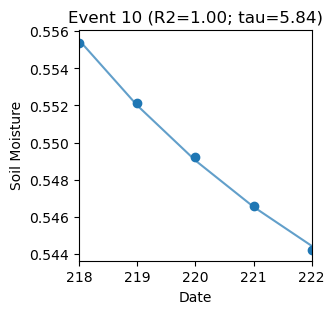

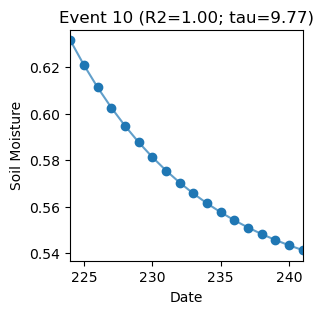

In [19]:
for index, drydown_event in drydown_and_params.iterrows():
    plot_expfit_results(i, drydown_event)

Text(0, 0.5, 'LAI [-]')

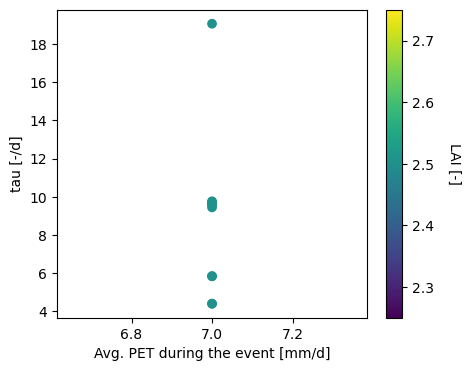

In [31]:
drydown_and_params['ET_max'] = climate.ET_max
drydown_and_params['mean_LAI'] = drydown_and_params['LAI'].apply(np.mean)
drydown_and_params['mean_ET'] = drydown_and_params['ET'].apply(len)
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(drydown_and_params['ET_max'], drydown_and_params['tau'], c=drydown_and_params['mean_LAI'])
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [-/d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('LAI [-]', rotation=270, labelpad=20)
# fig.savefig(os.path.join(output_path2, f'{target_station}_tau_vs_PET_vs_NDVI.png'))

In [13]:
# output.to_csv(r'..\output\ryoko_debug\test.csv')
# pd.read_csv(r'..\output\ryoko_debug\test.csv')